In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [28]:
df = pd.read_csv('Accommodation.csv')

In [29]:
#take a look at the dataset
df.head()

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,2021/01/20 7:57:57 AM GMT+1,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,Yes
1,2021/01/20 9:02:40 AM GMT+1,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000,Yes
2,2021/01/20 9:07:23 AM GMT+1,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,R3500,Yes
3,2021/01/20 9:27:25 AM GMT+1,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,NaN,Yes
4,2021/01/20 9:27:53 AM GMT+1,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,N/A,Yes


In [30]:
# data description
df.describe()

,Age,Monthly Salary in the currency you mentioned above,Years of working experience
count,121.000000,121.000000,121.000000
mean,23.421488,60587.603306,1.492975
std,2.798071,113215.106155,1.840282
min,18.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,23.000000,20000.000000,1.000000
75%,25.000000,70000.000000,2.000000
max,29.000000,800000.000000,10.000000


In [31]:
#checking the shape
df.shape

(121, 17)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          121 non-null    object 
 1   Age                                                                                                121 non-null    int64  
 2   Gender                                                                                             121 non-null    object 
 3   Maximum Level of Education                                                                         121 non-null    object 
 4   Country                                                                                            121 non-null    object 

from the above, it looks like we have some columns with missing values

In [33]:
#take a look at the columns names
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Maximum Level of Education', 'Country',
       'State/Province',
       'Based on your answer above, how industrious is your State of residence?',
       'Currency', 'Monthly Salary in the currency you mentioned above',
       'Career Industry', 'Years of working experience',
       'Do you foot your accommodation bills?',
       'If you selected "Not completely", what fraction of the rent do you pay?',
       'Accommodation Rented', 'Location of accommodation',
       'Cost of your accommodation per month',
       'Do you think accommodation prices are generally high in your State of residence for young adults?'],
      dtype='object')

From the above, some of the column names seems to be too long, understandable for the entry description, buh its not neccesary in this analysis, there for we will rename some of them

In [34]:
df.rename(columns={"Based on your answer above, how industrious is your State of residence?": "industrous level",
                   "Monthly Salary in the currency you mentioned above": "Salary",
                  "Years of working experience":"Working experience", 
                   "Do you foot your accommodation bills?":"pay Accomodation bills?",
                  'If you selected "Not completely", what fraction of the rent do you pay?': "fraction of rent paid",
                  'Cost of your accommodation per month': 'monthly rent'}, inplace= True)

In [35]:
df.isnull().sum()

Timestamp                                                                                             0
Age                                                                                                   0
Gender                                                                                                0
Maximum Level of Education                                                                            0
Country                                                                                               0
State/Province                                                                                        0
industrous level                                                                                      3
Currency                                                                                              0
Salary                                                                                                0
Career Industry                                                 

Pay accomodation bills seem to have the highest number of missing values of 93, therefore we would ignore the column, some of the monthly rent is missing, clearly does that doesnt pay rent.

Since we ll be dealing with accomodation and cost, we ll drop the columns with no monthly rent value

In [36]:
df.drop('fraction of rent paid', axis= 1, inplace=True)
df.dropna(inplace=True)

In [37]:
#drop the " Do you think accommodation prices are generally high in your State of residence for young adults?" columnn
df.drop("Do you think accommodation prices are generally high in your State of residence for young adults?", axis= 1, inplace=True)

check the Age distribution

In [38]:
df.isnull().sum()

Timestamp                     0
Age                           0
Gender                        0
Maximum Level of Education    0
Country                       0
State/Province                0
industrous level              0
Currency                      0
Salary                        0
Career Industry               0
Working experience            0
pay Accomodation bills?       0
Accommodation Rented          0
Location of accommodation     0
monthly rent                  0
dtype: int64

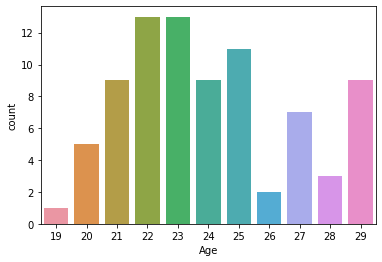

In [39]:
sns.countplot(df['Age']);

More of the data are form age 22 and 23, there are more of 25 and 29 too, there seem to be less of 26, 19, otheres are on the average

In [40]:
#ccheck out the categorical columns
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Timestamp', 'Gender', 'Maximum Level of Education', 'Country',
       'State/Province', 'industrous level', 'Currency', 'Career Industry',
       'pay Accomodation bills?', 'Accommodation Rented',
       'Location of accommodation', 'monthly rent'],
      dtype='object')

Data Exploratory analysis will be done on some of the above categorical columns particularly on the ones that seem to be a deciding factor.

In [41]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

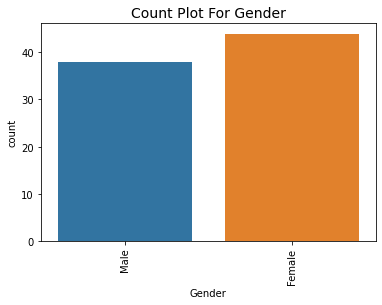

In [42]:
ax = sns.countplot(x="Gender", data=df);
plt.xticks(rotation=90)
ax.set_title('Count Plot For Gender', fontsize=14)
plt.show()


The above graph sjows we have more data from a Female than Male, the proportion is quite close, not too biased

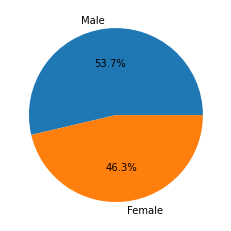

In [43]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%');

In [44]:
df['Maximum Level of Education'].unique()

array(["Bachelor's Degree/Equivalent", 'High/Secondary School',
       'Undergraduate', "Master's Degree"], dtype=object)

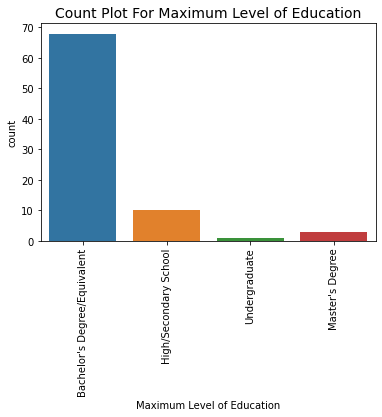

In [45]:
ax = sns.countplot(x="Maximum Level of Education", data=df);
plt.xticks(rotation=90)
ax.set_title('Count Plot For Maximum Level of Education', fontsize=14)
plt.show()


The above shows the distribution on the education level, most of the data consistsof people with Bachelor's Degree/Equivalent, which is expected, because of the age range which the data is concentrated on

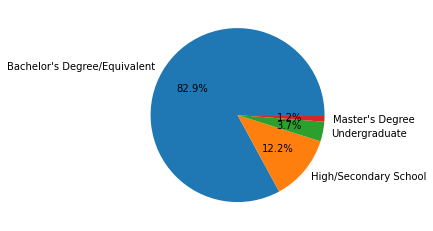

In [48]:
plt.pie(df['Maximum Level of Education'].value_counts(), labels=df['Maximum Level of Education'].unique(), autopct='%1.1f%%');

In [49]:
df['Country'].unique()

array(['Nigeria', 'Kenya', 'South Africa', 'Nigeria ', 'NIGERIA',
       'Nigerian', 'NIGERIAN', 'Adamawa', 'NIGERIA '], dtype=object)

The above shows, there has been some irregularities in the spelling, lets fix that

In [50]:
#rename all Nigeria to same case in Country Column
df["Country"].replace({"Nigeria ": "Nigeria", "Nigerian": "Nigeria", "NIGERIAN":"Nigeria", "NIGERIA":"Nigeria", "Adamawa":"Nigeria", "NIGERIA ":"Nigeria"}, inplace=True)

In [51]:
df['Country'].unique()

array(['Nigeria', 'Kenya', 'South Africa'], dtype=object)

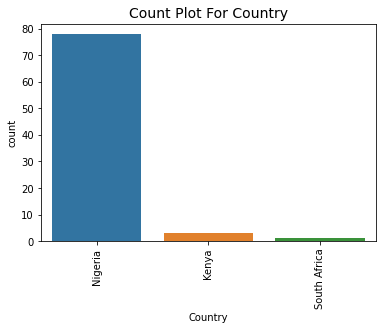

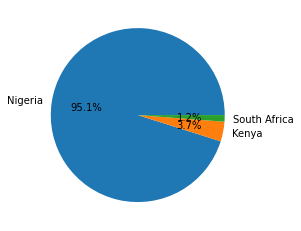

In [52]:
ax = sns.countplot(x='Country', data=df);
plt.xticks(rotation=90)
ax.set_title(f'Count Plot For Country', fontsize=14)
plt.show()
plt.pie(df['Country'].value_counts(), labels=df['Country'].unique(), autopct='%1.1f%%');    


The above shows most of the data comes from Nigeria, a mojority of about 92%

In [53]:
df['State/Province'].unique()

array(['Lagos', 'Nairobi', 'Cape Town', 'Rivers State', 'Delta', 'Osun',
       'Ekiti', 'OSUN', 'FCT', 'Oyo state', 'Lagos ', 'Nigeria', 'LAGOS',
       'Osun State', 'Ogun State', 'Lagos State', 'OYO',
       'Ilorin, Kwara state', 'Niger state', 'ANAMBRA STATE, NIGERIA',
       'Lagos State/ Ikorodu', 'BORNO ', 'Enugu', 'lagos', 'ENUGU',
       'Lagos, Lagos', 'FEDERAL CAPITAL TERRITORY.', 'FCT Abuja',
       'Rivers', 'Oyo', 'Akwa Ibom', 'Cross river', 'Abia State',
       'Lagos and Osun', 'Oyo State', 'STATE ',
       'FEDERAL CAPITAL TERRITORY, ABUJA', 'Kano', 'Cross River', 'Ondo',
       'Abuja', 'Anambra', 'OGUN STATE', 'ogun'], dtype=object)

an inconsistency in the values shows in the above, which will be fixed in the next line.

In [54]:
#remove white spaces
df['State/Province'] = df['State/Province'].apply(lambda x : x.strip().lower().replace('state',"").replace('.',''))

In [55]:
df['State/Province'].unique()

array(['lagos', 'nairobi', 'cape town', 'rivers ', 'delta', 'osun',
       'ekiti', 'fct', 'oyo ', 'nigeria', 'osun ', 'ogun ', 'lagos ',
       'oyo', 'ilorin, kwara ', 'niger ', 'anambra , nigeria',
       'lagos / ikorodu', 'borno', 'enugu', 'lagos, lagos',
       'federal capital territory', 'fct abuja', 'rivers', 'akwa ibom',
       'cross river', 'abia ', 'lagos and osun', '',
       'federal capital territory, abuja', 'kano', 'ondo', 'abuja',
       'anambra', 'ogun'], dtype=object)

Some more fixes..

In [56]:
#rename all Nigeria to same case in Country Column

df["State/Province"].replace({'ilorin, kwara':'kwara','anambra , nigeria':'anambra', 'f.c.t. - abuja':'abuja'
                      ,'fct':'abuja','lagos / ikorodu':'lagos','lagos, lagos':'lagos','federal capital territory':"abuja",
                       'fct abuja':"abuja","lagos and osun":"lagos",'fct - abuja':'abuja'
                      }, inplace=True)





In [57]:
df['State/Province'].unique()

array(['lagos', 'nairobi', 'cape town', 'rivers ', 'delta', 'osun',
       'ekiti', 'abuja', 'oyo ', 'nigeria', 'osun ', 'ogun ', 'lagos ',
       'oyo', 'ilorin, kwara ', 'niger ', 'anambra', 'borno', 'enugu',
       'rivers', 'akwa ibom', 'cross river', 'abia ', '',
       'federal capital territory, abuja', 'kano', 'ondo', 'ogun'],
      dtype=object)

We seem to have gotten clean unique values

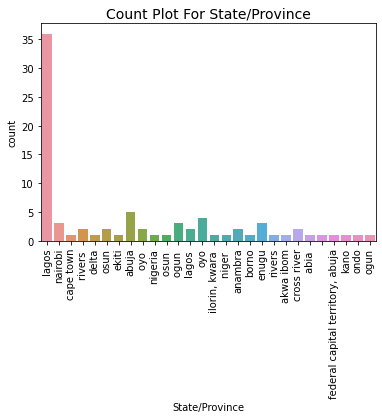

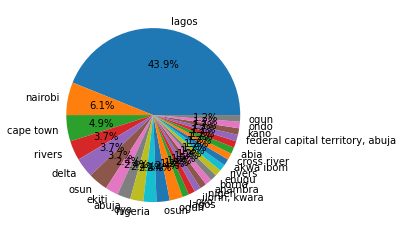

In [59]:
ax = sns.countplot(x='State/Province', data=df);
plt.xticks(rotation=90)
ax.set_title(f'Count Plot For State/Province', fontsize=14)
plt.show()
plt.pie(df['State/Province'].value_counts(), labels=df['State/Province'].unique(), autopct='%1.1f%%');    


From the above, Lagos has the majority of the data of about 44% of the whole data

In [60]:
df['industrous level'].unique()

array(['Industrious', 'Most industrious in the country',
       'Non-Industrious', 'Unknown'], dtype=object)

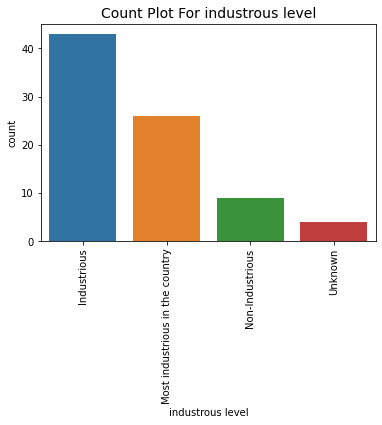

In [61]:
ax = sns.countplot(x='industrous level', data=df);
plt.xticks(rotation=90)
ax.set_title(f'Count Plot For industrous level', fontsize=14)
plt.show()
# plt.pie(df['State/Province'].value_counts(), labels=df['State/Province'].unique(), autopct='%1.1f%%');    

From the data most seem to have accomodations in industrious area, much in 'most industrous in the count , others non industrious.

In [65]:
print(df['Currency'].unique())


# resolve the incosistent spelling
df['Currency'] = df['Currency'].apply(lambda x:x.strip().lower())

['naira' 'kenyan shillings' 'rand' 'naira, dollars' 'dollars']


In [66]:
df['Currency'].unique()

array(['naira', 'kenyan shillings', 'rand', 'naira, dollars', 'dollars'],
      dtype=object)

In [67]:
#rename all Nigeria to same case in Country Column

df["Currency"].replace({"naira, dollars": "naira", "naria":"naira"}, inplace=True)

In [68]:
df['Currency'].unique()

array(['naira', 'kenyan shillings', 'rand', 'dollars'], dtype=object)

In [69]:
df["Career Industry"].unique()

array(['Accounting & Tech', 'Software Engineer', 'Hospitality', 'Tech',
       'Engineering ', 'Teaching', 'AGRICULTURE', 'Consulting ',
       'Development', 'Management ', 'Accounting ', 'Accounting',
       'Tailoring', 'Media', 'Technology', 'Crafts', 'Music ',
       'Agriculture', 'INFORMATION TECHNOLOGY', 'Mechanic', 'TECH',
       'Fashion designing ', 'Construction ', 'Engineering', 'Utility',
       'Clothing', 'Architecture ', 'Education ', 'Education', 'FinTech',
       'Student', 'Tech ', 'Geoscience ', 'Health', 'Law', 'AUDIT FIRM ',
       'Education/Teaching', 'UI Design', 'Aviation',
       'Graphics and printing ', 'Banking', 'Advertising, Research',
       'Insurance', 'nil'], dtype=object)

In [70]:
#trying to fix the multiple values
df["Career Industry"] = df["Career Industry"].apply(lambda x: x.strip().lower())
df['Career Industry'].unique()

array(['accounting & tech', 'software engineer', 'hospitality', 'tech',
       'engineering', 'teaching', 'agriculture', 'consulting',
       'development', 'management', 'accounting', 'tailoring', 'media',
       'technology', 'crafts', 'music', 'information technology',
       'mechanic', 'fashion designing', 'construction', 'utility',
       'clothing', 'architecture', 'education', 'fintech', 'student',
       'geoscience', 'health', 'law', 'audit firm', 'education/teaching',
       'ui design', 'aviation', 'graphics and printing', 'banking',
       'advertising, research', 'insurance', 'nil'], dtype=object)

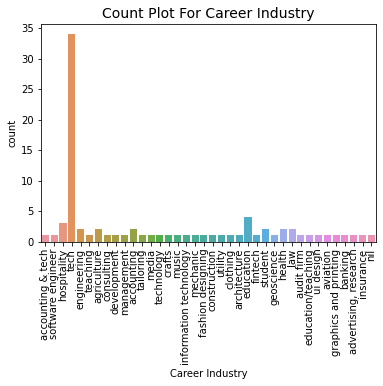

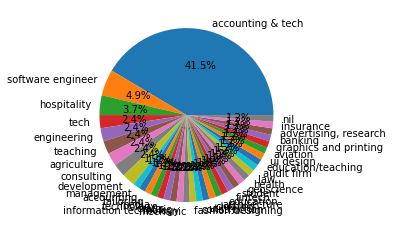

In [72]:
ax = sns.countplot(x='Career Industry', data=df);
plt.xticks(rotation=90)
ax.set_title(f'Count Plot For Career Industry', fontsize=14)
plt.show()
plt.pie(df['Career Industry'].value_counts(), labels=df['Career Industry'].unique(), autopct='%1.1f%%');    


According to the data, Most people seem to be into the Accounting and tech career

In [267]:
df['Accommodation Rented'].unique()

array(['Full Flat', 'Shared Flat', 'Neither. I do not pay rents',
       'Self-contained', 'Studio apartment', 'Shared Duplex', 'Mini Flat',
       'Hostel', 'Single room', '1 room face me I face you ',
       'I do not have an accomodation', 'Shared hostel space'],
      dtype=object)

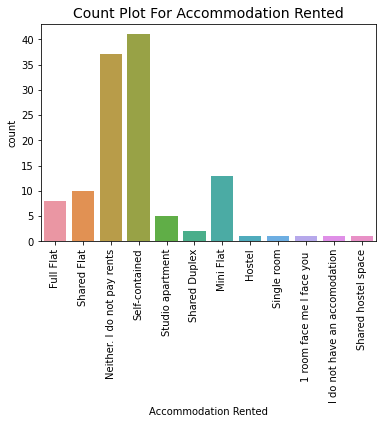

In [268]:
ax = sns.countplot(x='Accommodation Rented', data=df);
plt.xticks(rotation=90)
ax.set_title(f'Count Plot For Accommodation Rented', fontsize=14)
plt.show()
# plt.pie(df['State/Province'].value_counts(), labels=df['State/Province'].unique(), autopct='%1.1f%%');    


In [269]:
df['pay Accomodation bills?'].unique()

array(['Yes', 'No', 'Not completely'], dtype=object)

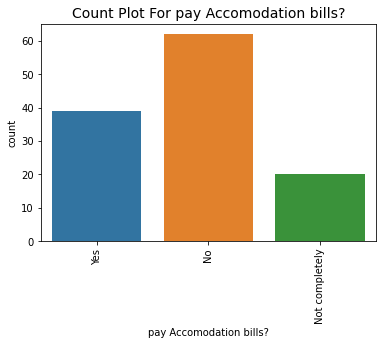

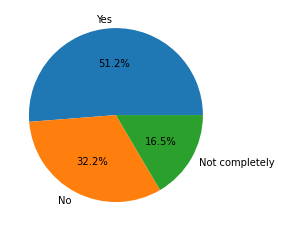

In [270]:
ax = sns.countplot(x='pay Accomodation bills?', data=df);
plt.xticks(rotation=90)
ax.set_title(f'Count Plot For pay Accomodation bills?', fontsize=14)
plt.show()
plt.pie(df['pay Accomodation bills?'].value_counts(), labels=df['pay Accomodation bills?'].unique(), autopct='%1.1f%%');    


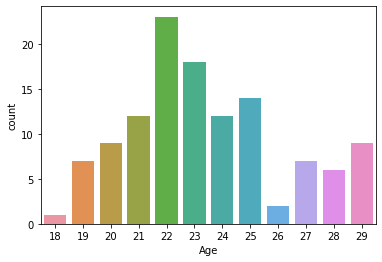

In [318]:
def convert_to_naira(amount,currency):
    if currency =='naira':
        return amount
    elif currency == 'dollars':
        return amount * 475
    elif currency == 'kenyan shillings':
        return amount* 3.46
    elif currency == 'rand':
        return amount* 25.13

In [292]:
df['monthly rent'] = df['monthly rent'].apply(lambda x: re.sub(r"([^0-9])", '',x))

In [293]:
drop_index = df[df['monthly rent']==''].index[0]
df.drop(drop_index, inplace=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [273]:
# df['monthly rent'] = df['monthly rent'].astype('str').apply(lambda x:x.replace("R",'').
#                                                             replace(',','').replace('#','').
#                                                            replace(' ','').replace('None','').
#                                                            replace('03000000000n0a0i0r0a0','0'))


df['monthly rent'] = df['monthly rent'].str.replace('nan','0')
df['monthly rent'] = df['monthly rent'].str.replace('N/A','0')


In [294]:
df['Currency'] = df['Currency'].astype('str')
df['monthly rent'] = df['monthly rent'].astype('int64')

In [323]:
for index, row in df.iterrows():
    df['rent in Naira'][index] = convert_to_naira(row['monthly rent'],row['Currency'])

<ipython-input-323-e9882c45bef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rent in Naira'][index] = convert_to_naira(row['monthly rent'],row['Currency'])


In [325]:
df.head()

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,industrous level,Currency,Salary,Career Industry,Working experience,pay Accomodation bills?,fraction of rent paid,Accommodation Rented,Location of accommodation,monthly rent,rent in Naira
0,2021/01/20 7:57:57 AM GMT+1,24,Male,Bachelor's Degree/Equivalent,Nigeria,lagos,Industrious,naira,150000,accounting & tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,80000
1,2021/01/20 9:02:40 AM GMT+1,27,Female,Bachelor's Degree/Equivalent,Kenya,nairobi,Most industrious in the country,kenyan shillings,150000,software engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000,121100
2,2021/01/20 9:07:23 AM GMT+1,25,Female,High/Secondary School,South Africa,cape town,Non-Industrious,rand,2000,hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,3500,87955
3,2021/01/20 9:27:25 AM GMT+1,28,Female,Bachelor's Degree/Equivalent,Nigeria,lagos,Most industrious in the country,naira,0,it,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,0,0
4,2021/01/20 9:27:53 AM GMT+1,24,Female,Bachelor's Degree/Equivalent,Nigeria,lagos,Industrious,naira,70000,tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,0,0


In [374]:
df.describe()

,Age,Salary,Working experience,monthly rent,rent in Naira
count,120.000000,120.000000,120.000000,120.000000,1.200000e+02
mean,23.425000,61092.500000,1.497083,28796.208333,8.016650e+04
std,2.809535,113552.926365,1.847441,77867.288347,5.448723e+05
min,18.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,22.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,23.000000,20000.000000,1.000000,6750.000000,7.000000e+03
75%,25.000000,71250.000000,2.000000,20208.250000,2.500000e+04
max,29.000000,800000.000000,10.000000,700000.000000,5.937500e+06


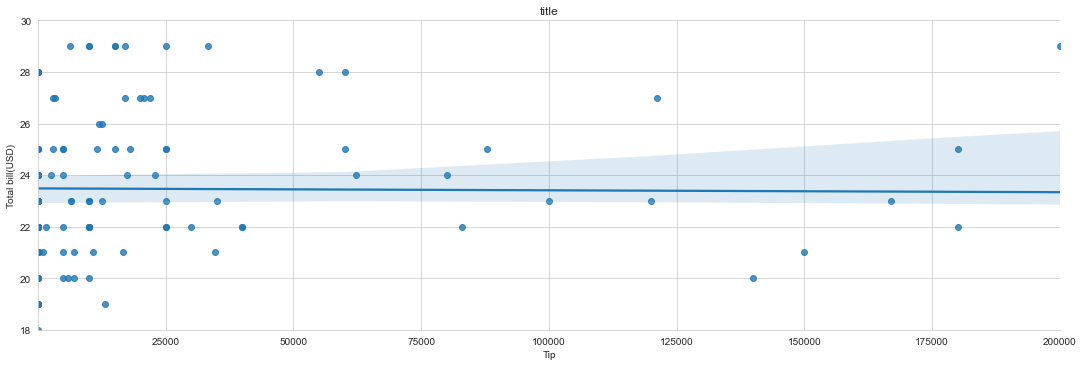

In [384]:
## sns.set_style("whitegrid")

g = sns.lmplot(x="rent in Naira", y="Age", data=df,

               
 aspect=3)

g = (g.set_axis_labels("Tip","Total bill(USD)").

set(ylim=(18,30),xlim=(100,200000)))

plt.title("title")

plt.show(g)

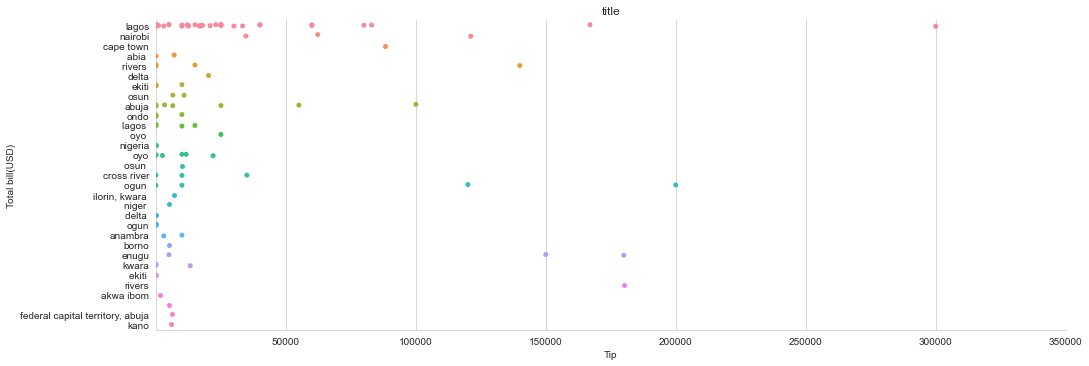

In [379]:
sns.set_style("whitegrid")

g = sns.catplot(x="rent in Naira", y="State/Province", data=df,

 aspect=3)

g = (g.set_axis_labels("Tip","Total bill(USD)").
set(xlim=(100,350000)))

plt.title("title")

plt.show(g)